# World Ocean Data Experimentation

In this, we're going to learn how to manipulate the dataset to tell the stories we want to tell.

There's a lot we can do with the dataset once we import it.

Let's do that, along with all the other cool Python libraries we'll need.

In [11]:
# Import the stuff we need
import pandas as pd # Pandas: Turn spreadsheets into useful DataFrame objects
import numpy as np # NumPy: Handy math functions
import seaborn as sns # Seaborn: Pretty graphs/charts
import matplotlib.pyplot as plt # Matplotlib: What pandas and seaborn use under the hood

# Create a dataframe from the raw CSV data file
df = pd.read_csv("wod.csv").drop("datetime.1",axis=1)
df = df.set_index(pd.DatetimeIndex(df.datetime))
# Check out the shape of the DataFrame (rows/columns)
print(df.shape)

(24259, 14)


Kind of a lot going on in there already. First we imported a whole bunch of Python modules that we use to work with our dataset. You'll see them in use as we go through the example code. For now, the most important module we need to know about is **pandas**. Pandas is an amazing tool for data science that lets us turn raw data into a special data type known as a **DataFrame**. Think of DataFrames as spreadsheets that you can store and manipulate with code.

Working with spreadsheets is one way of analyzing data, but as your datasets get larger, this kind of "manual" analysis gets more and more unwieldy. 

Take a look up there at what `print(df.info())` says about our DataFrame. It has 24,259 rows and 14 columns. That's...

In [16]:
24259 * 14 # Don't judge me. I learned programming so I wouldn't have to do arithmetic in my head.

339626

...individual pieces of data. That's just too much to work with in a spreadsheet. Besides, this way, no errant clicks will damage our data!

## Working with DataFrames

DataFrames exist to make working with data easier. But like all objects in code, we have to know the **methods** that we can use. [This link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) will take you to a full list of what DataFrames can do, but let's give a few useful examples.

### Basic DataFrame Info
It's always good to know how much data you're working with, and what kind. For that, we have the `shape` property and the `info()` method. `shape` shows us a pair of values, indicating how many rows/columns our DataFrame has. Let's try it now.

In [12]:
print(df.shape) # Note that shape is a property, not a function that we call with ()

(24259, 14)


`info()` will give us a rundown of each column in the DataFrame, as well as the DataFrame's **index**.

### Index

A DataFrame's index is like its built-in x-axis. When we go about graphing individual columns, you'll see that we never have to provide an x-axis value, because pandas uses the index by default. Let's look at the info for our DataFrame now:

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24259 entries, 2010-01-23 11:00:00 to 2016-11-21 08:00:00
Data columns (total 14 columns):
datetime               24259 non-null object
depth                  24259 non-null float64
depth_qc               24259 non-null int64
oxygen                 23413 non-null float64
salinity               23447 non-null float64
salinity_qc_flag       23447 non-null float64
temperature            23875 non-null float64
temperature_qc_flag    23875 non-null float64
latitude               24259 non-null float64
longitude              24259 non-null float64
year                   24259 non-null int64
month                  24259 non-null int64
day                    24259 non-null int64
time                   24259 non-null float64
dtypes: float64(9), int64(4), object(1)
memory usage: 3.4+ MB
None


You'll notice right up top that this DataFrame has a `DatetimeIndex`. The other option would be a `RangeIndex`, which would just mean a row number. `DatetimeIndex` is handy, which we'll see shortly.

You also see what columns are available for use. Looks like we have `depth`, `oxygen`, `salinity`, and `temperature` among others.

Be aware that not all the columns have data in each row. If you don't see a `24259` next to the column name, there's some missing data. Keep that in mind when analyzing.

Now that we know the shape of the data, Let's take a look at the values themselves. `head()` gives us a quick preview of the first few rows of our DataFrame.

In [50]:
print(df.head())

                                datetime  depth  depth_qc  oxygen  salinity  \
datetime                                                                      
2010-01-23 11:00:00  2010-01-23 11:00:00    0.0         0    5.65    33.380   
2010-01-23 11:00:00  2010-01-23 11:00:00    5.0         0    5.65    33.383   
2010-01-23 11:00:00  2010-01-23 11:00:00   10.0         0    5.64    33.378   
2010-01-23 11:00:00  2010-01-23 11:00:00   15.0         0    5.64    33.378   
2010-01-23 11:00:00  2010-01-23 11:00:00   20.0         0    5.64    33.379   

                     salinity_qc_flag  temperature  temperature_qc_flag  \
datetime                                                                  
2010-01-23 11:00:00               0.0        14.32                  0.0   
2010-01-23 11:00:00               0.0        14.33                  0.0   
2010-01-23 11:00:00               0.0        14.34                  0.0   
2010-01-23 11:00:00               0.0        14.33                  0.0

Looks reasonable. Let's drill down.

## Accessing single columns

If I want to look at _just_ temperature (and the index, of course), I can select that column with the syntax:

```python
df["temperature"]
```
That provides a Series (like a 1-column DataFrame) with just temperature. Check it out:

In [55]:
temps = df["temperature"] # Change this to another column to see what you get!
print(temps.head())

datetime
2010-01-23 11:00:00    14.32
2010-01-23 11:00:00    14.33
2010-01-23 11:00:00    14.34
2010-01-23 11:00:00    14.33
2010-01-23 11:00:00    14.34
Name: temperature, dtype: float64


## Filtering Data

Sometimes you don't want _all_ the data. Sometimes you just want a piece. Filtering helps us with that. Let's say I only want data from Januaries. As in, I want to know what things were like across our date range, but _only_ in January.

Helpfully, our DataFrame has a `month` column in it, where numbers `1` to `12` indicate the month of the row's data. Just like we used a column name to get only a single column, we can use a **boolean expression** to filter our data down to just rows that match our expression.

Remember that boolean expressions evaluate to `True` or `False`. So if I were to say "Only January," in our DataFrame, the expression would be:

```python
df["month"] == 1
```

When I put that whole thing in brackets, I get a filtered DataFrame with just the rows that match the expression. We'll also grab data from Mays for comparison. Try it:

In [67]:
jans = df[df["month"] == 1]
mays = df[df["month"] == 5]
print(mays.shape)
# Get the average of the month # in January to prove it's only Januaries
print("jans average month:", jans["month"].mean()) # Cool trick, right?
print("mays average month:", mays["month"].mean())

(827, 14)
jans average month: 1.0
mays average month: 5.0


We can also filter data based on limits. Let's find out what the maximum, minimum, median, and average depth in our dataset is:

In [69]:
print("Max depth: ", df["depth"].max())
print("Min depth: ", df["depth"].min())
print("Avg depth: ", df["depth"].mean())
print("Median depth: ", df["depth"].median())

Max depth:  3500.0
Min depth:  0.0
Avg depth:  161.7344078486335
Median depth:  80.0


Sooo, it's pretty clear that most of our data is _not_ up at 3500. Later, we'll do a visual analysis for more clarity on this. But for now, let's keep our depth data to 200 feet and higher.

In [74]:
filtered_depth = df[df["depth"] <= 200] # Play with the number to see how the shape changes!
print(filtered_depth.shape)

(17321, 14)


## Visualizing Data

This is the fun part. We can easily make plots of our data with pandas and **seaborn**, another Python module that makes pretty pretty pictures.

**USE THE FOLLOWING EXAMPLES AS SAMPLE CODE YOU CAN COPY/PASTE/MODIFY**

### Choosing the right plot

The correct visualization for your data has to do with that story you want to tell. Is it about change over time? Clustering of data points? Performance of individuals? Every data story has better and worse options for visualization. Let's go through some of them.


### Line Plots

Line plots are best for explaining changes in values over time. For example, perhaps we want to see surface temperature values over the course of our date range. First we need to filter our data for just surface values.

In [25]:
surface = df[df.depth <= 0]
print(surface.shape) # Confirm that we got a filtered list

(780, 14)


Now, because our data isn't super even, we're really going to group this up a little more. By year sounds good. We're going to use the `.resample()` method of our DataFrame to group and average the results.

In [41]:
surface = surface.resample("Y").mean() # 'Y' does yearly resamples and 'M' does monthly

Now, let's plot temperature over time. We just need the `temperature` column. Luckily DataFrame and Series objects have a built-in `plot()` that makes this really easy.

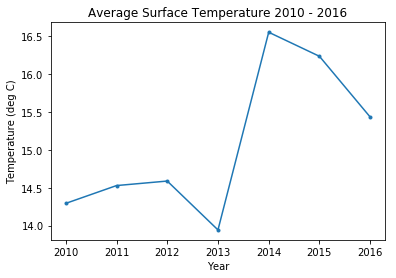

In [42]:
plt.clf() # Clear any old plots
surface["temperature"].plot(style=".-") # No style argument results in a line. "." results in just dots, and ".-" gives us dots + lines
plt.xlabel("Year")
plt.ylabel("Temperature (deg C)")
plt.title("Average Surface Temperature 2010 - 2016")
plt.show() # Show the thing

What have we learned? It seems like the average surface temperature is trending up. But we don't have too many data points to be sure. We'd need several more years of data collection to confidently draw conclusions.

### Line/Scatter plots with more than one variable

Say you wanted to compare depth, pressure, and oxygen. Your hypothesis might be, "As depth increases, oxygen increases and temperature drops." Given that description, depth would be your x axis, and you'd put pressure and temperature _both_ on your y. To do this, we'll need to manually create our plot with the `pyplot` module, used here as `plt`.

We're going to do this as a "scatter" plot, which is like a line plot, but with dots instead of lines. The lines might get messy.

Text(0.5,1,'Oxygen and Temperature by Depth')

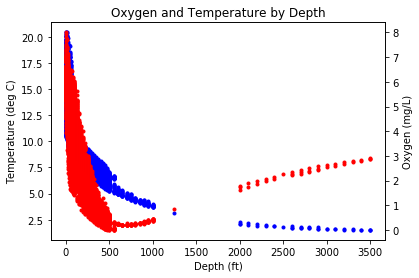

In [94]:
plt.clf() # Again, clear all previous plots
fig, axes1 = plt.subplots() # Create the figure and our first set of axes
axes1.plot(df.depth, df.temperature, "b.") # The "b." is a style string that sets the line style to points (.) and in blue (b)
axes1.set_ylabel("Temperature (deg C)")
axes1.set_xlabel("Depth (ft)")

axes2 = axes1.twinx() # Clone the first pair of axes
axes2.plot(df.depth, df.oxygen, "r.")
axes2.set_ylabel("Oxygen (mg/L)")
plt.title("Oxygen and Temperature by Depth")


Problem is, we have a lot of overlapping data points, so this is hard to read. Instead, we can use subplots to create 2 graphs at once! Same data now, but with `subplot()` to make multiple graphs.

Text(0.5,1,'Dissolved Oxygen change over depth')

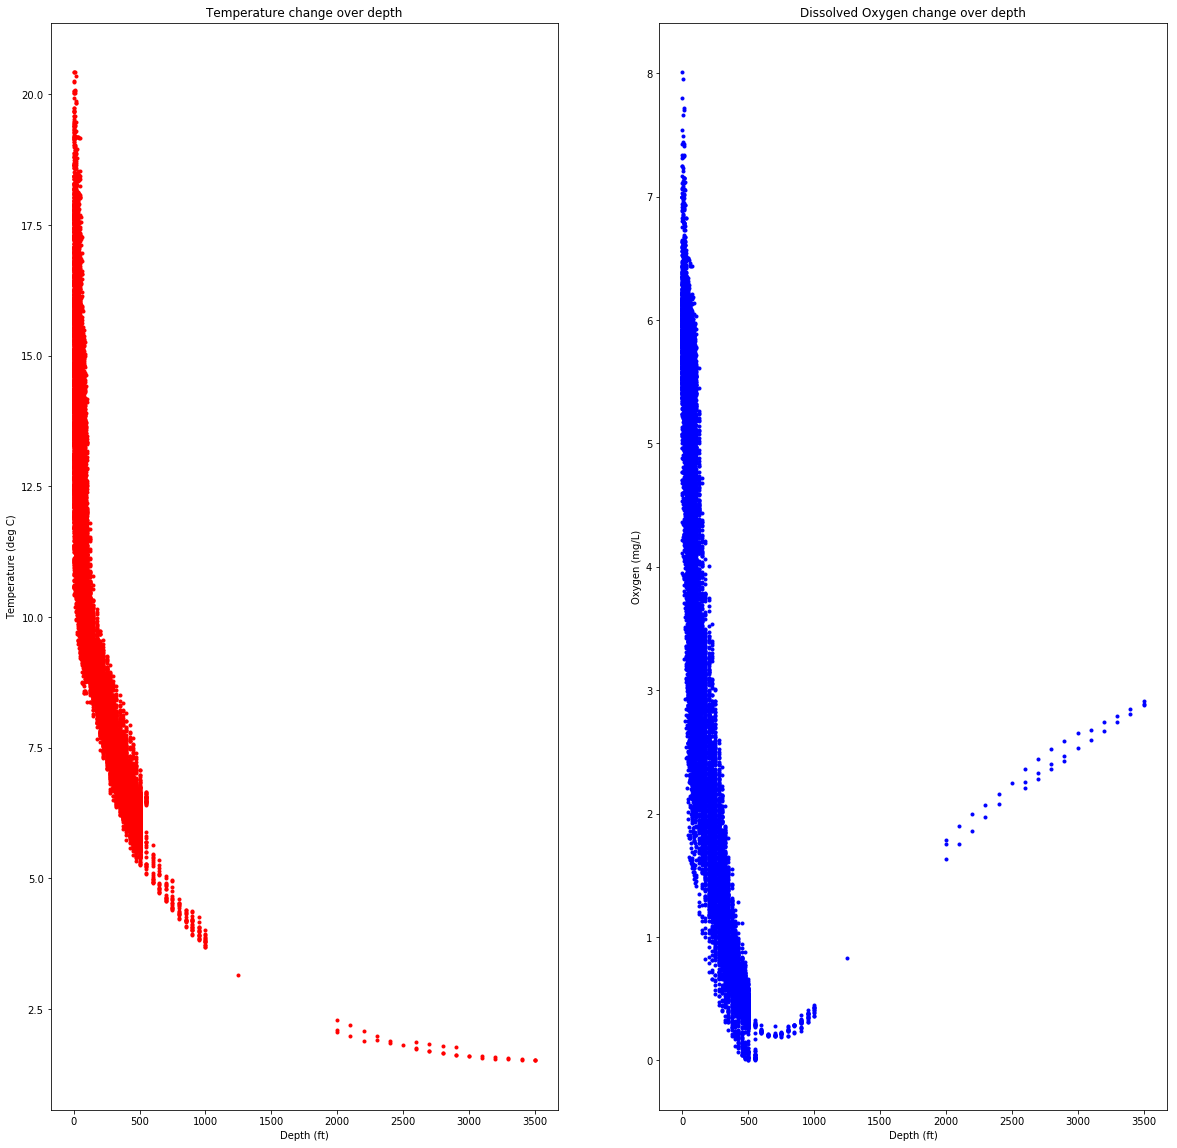

In [63]:
plt.clf() # clf stands for "clear file", not "cliff"
plt.figure(figsize=[20,20]) # We can make the plot bigger/smaller
plt.subplot(1,2,1) # 1 row, 2 columns, select the 1st cell. 
plt.plot(df.depth, df.temperature, "r.")
plt.ylabel("Temperature (deg C)")
plt.xlabel("Depth (ft)")
plt.title("Temperature change over depth")

# Notice that we repeat the commands, but after selecting the 2nd subplot
plt.subplot(1,2,2) # 1 row, 2 columns, select the 2nd cell. 
plt.plot(df.depth, df.oxygen, "b.")
plt.ylabel("Oxygen (mg/L)")
plt.xlabel("Depth (ft)")
plt.title("Dissolved Oxygen change over depth")


Interesting! Seems like there's definitely some kind of relationship, at least in the shallows. Something's going on down deep though: oxygen goes back up at about 1000 ft, while temperature does not. Perhaps other data points might be illuminating...

### Distribution Plots

Sometimes you want to know how data is distributed over the possible values. For this, you would use a distribution plot, also known as a histogram.

Let's make a range of random numbers and show the distribution with **seaborn**. By the way, randomly generated numbers should follow a "regular" distribution, meaning no value has more occurrences than another.

Histograms group values into "bins." The width of a bin is the range of values contained within it. Seaborn is pretty good about picking the number of bins, but you can customize it with passing a `bins` parameter to `distplot()`.

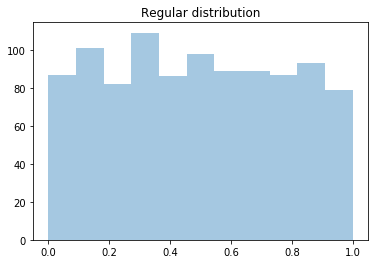

In [81]:
x = np.random.rand(1000)
plt.clf()
sns.distplot(x, kde=False) # We don't need a Kernel Density Estimate, so we set kde to False
plt.title("Regular distribution")
plt.show()

Pretty close! By the way, a "normal" distribution clusters around the media value, like so:

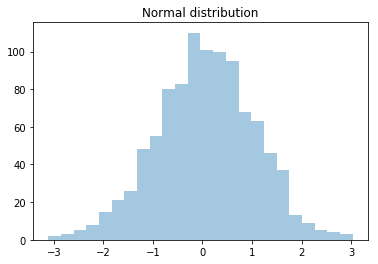

In [79]:
x = np.random.randn(1000)
plt.clf()
sns.distplot(x, kde=False)
plt.title("Normal distribution")
plt.show()

Here's a distribution plot on `temperature`, giving us an idea as to the distribution of all the temperature readings:

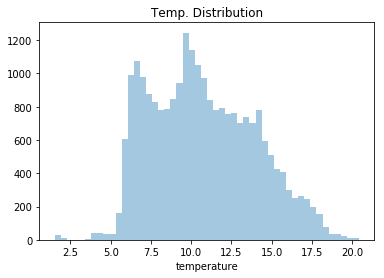

In [83]:
plt.clf()
sns.distplot(df.temperature.dropna(), kde=False)
plt.title("Temp. Distribution")
plt.show()

### Box Plots/Violin Plots

When we have a lot of grouped data and we want to understand its ranges, a box plot might be appropriate. Box plots give us a visual representation of the distribution of data along an axis.

![boxplot-diagram](https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090)

We'll use *seaborn* to make a box plot of our temperature data over time.

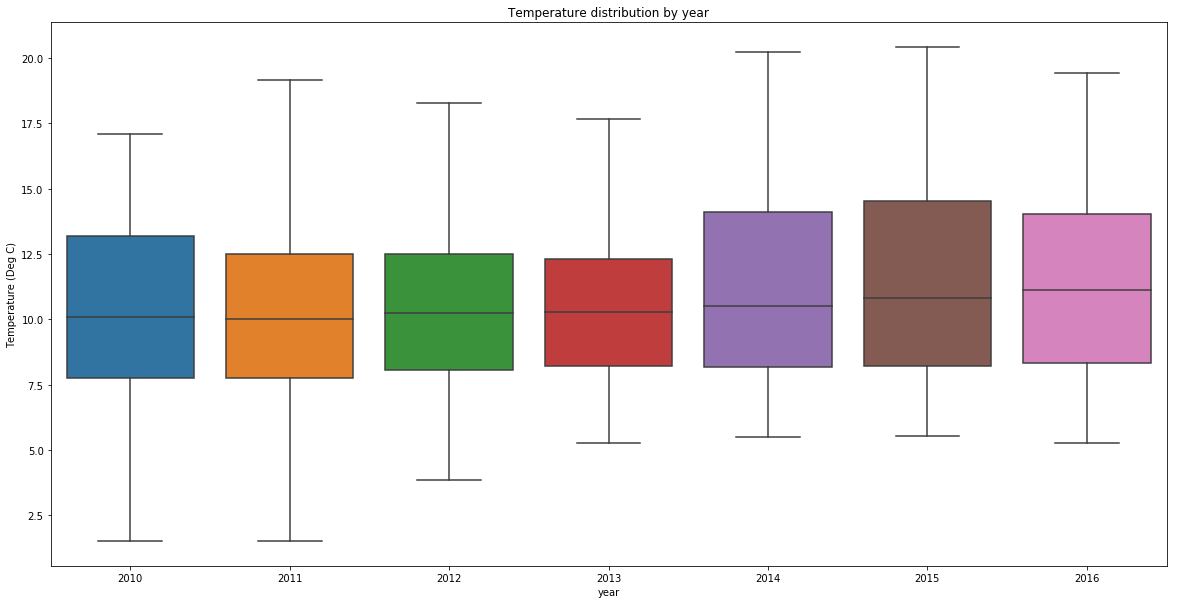

In [66]:
plt.clf()
plt.figure(figsize=[20,10])
sns.boxplot(x="year", y="temperature", data=df) # We name columns as x/y arguments, and the whole dataframe as the source of the data
plt.title("Temperature distribution by year")
plt.ylabel("Temperature (Deg C)")
plt.show()

Keep in mind that this is for _all_ temperatures at _all_ depths. You might want to use filtering to find out the different distributions at different depths.

### Violin Plots

These are similar to Box plots, but they give a representation of the distribution of the data. Think of them as a box plot where the shape of the box becomes a histogram. The wider the colored area, the more data points in that area of the range. Let's do the same analysis—temperature by year—but this time with a violin plot.

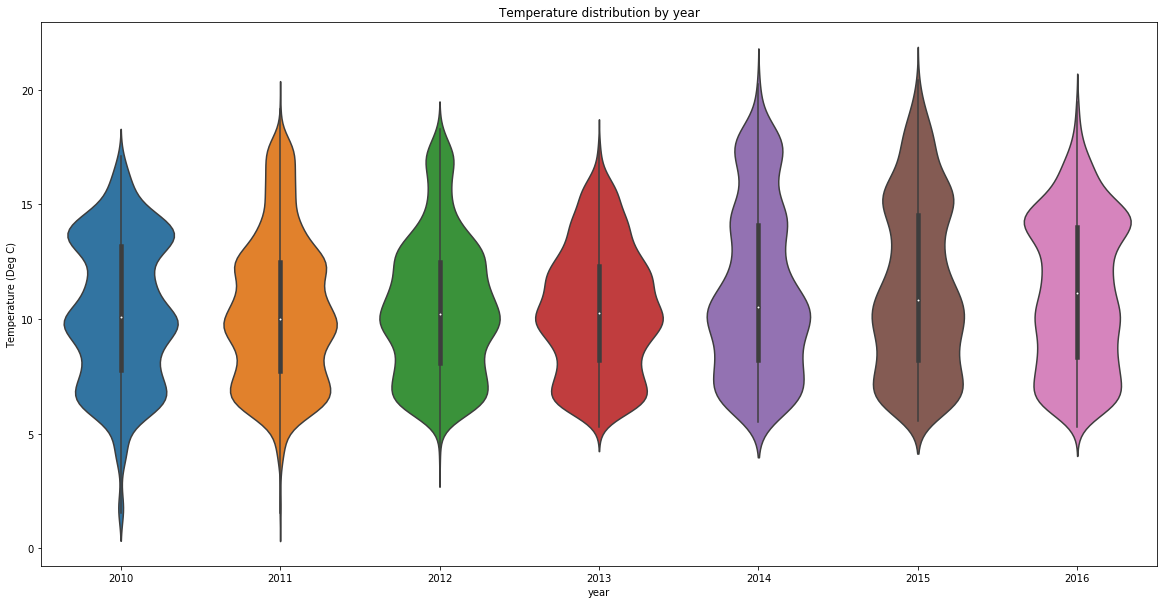

In [85]:
plt.clf()
plt.figure(figsize=[20,10])
sns.violinplot(x="year", y="temperature", data=df) # We name columns as x/y arguments, and the whole dataframe as the source of the data
plt.title("Temperature distribution by year")
plt.ylabel("Temperature (Deg C)")
plt.show()

Besides looking like [siphonophores](https://en.wikipedia.org/wiki/Siphonophorae), these plots show that the temperature readings really do cluster around certain values.

## Your Turn

Now it's time to figure out exactly what you want to analyze. Answer these questions before proceeding:

* What is my research question?
* What data will tell the story?
* Do I need to filter my data? How?
* Do I need to resample my data? Monthly? Yearly? Hourly?
* What plots will best tell my story?

With those answers in mind, add cells below and, using the code above as a guide, create your plots!

In [86]:
# Fill this with your code...